<a href="https://colab.research.google.com/github/andersonbispos/dio-projeto-pandas/blob/master/AnalisePandas_Entrega_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Conclusão do Curso Análise de Dados com Pandas




### Datasets

[Aracaju](https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Aracaju.xlsx)
[Fortaleza](https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Fortaleza.xlsx)
[Natal](https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Natal.xlsx)
[Recife](https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Recife.xlsx)
[Salvador](https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Salvador.xlsx)

## Setup Inicial

### Importando as libs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Carregando nos dados

In [ ]:
def load_concat():
  df1 = pd.read_excel('https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Aracaju.xlsx?raw=true')
  df2 = pd.read_excel('https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Fortaleza.xlsx?raw=true')
  df3 = pd.read_excel('https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Natal.xlsx?raw=true')
  df4 = pd.read_excel('https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Recife.xlsx?raw=true')
  df5 = pd.read_excel('https://github.com/andersonbispos/dio-projeto-pandas/blob/master/datasets/Salvador.xlsx?raw=true')

  df = pd.concat([df1,df2,df3,df4,df5])

  return df

In [ ]:
df = load_concat()

## Análise Inicial dos Dados

In [ ]:
# Verificando quantidade de colunas e linhas
df.shape

(894, 5)

In [ ]:
# Verificando tipos dos dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Exibindo um sample dos dados
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
122,Aracaju,2018-01-01,38.49,1522,4
99,Aracaju,2018-01-01,139.32,1521,3
104,Salvador,2019-01-01,188.79,1036,3
0,Natal,2018-08-27,606.00,853,2
129,Natal,2019-01-02,125.66,1037,1
176,Salvador,2019-01-02,19.42,1035,3
228,Salvador,2019-01-02,6.87,1037,3
12,Fortaleza,2019-01-01,NaN,1004,2
206,Salvador,2019-01-02,151.45,1036,2
53,Aracaju,2018-01-01,8.64,1522,2


In [ ]:
# Verificando valores ausentes
df.isnull().sum()

Cidade     0
Data       0
Vendas    20
LojaID     0
Qtde       0
dtype: int64

In [ ]:
# Quais cidades temos lojas
df['Cidade'].unique()

array(['Aracaju', 'Fortaleza', 'Natal', 'Recife', 'Salvador'],
      dtype=object)

In [ ]:
# Avaliacao estatística geral do conjunto de dados
df.describe()

,Vendas,LojaID,Qtde
count,874.000000,894.000000,894.000000
mean,123.786384,1074.844519,3.261745
std,168.295470,191.360735,2.096964
min,3.010000,852.000000,1.000000
25%,22.397500,983.000000,2.000000
50%,44.550000,1035.000000,3.000000
75%,161.410000,1037.000000,4.000000
max,886.000000,1523.000000,10.000000


In [ ]:
# Quantidade de Valores por coluna
df.count()

Cidade    874
Data      874
Vendas    874
LojaID    874
Qtde      874
dtype: int64

In [ ]:
# Inico do período do df
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Inico do período do df
df['Data'].max()

Timestamp('2019-04-05 00:00:00')

### Limpeza e Transformação

In [ ]:
# verificando quais linhas tem valores nulos
filtro = df['Vendas'].isnull()
df.loc[filtro]

,Cidade,Data,Vendas,LojaID,Qtde
4,Fortaleza,2019-01-01,NaN,1004,6
5,Fortaleza,2019-01-01,NaN,1002,5
6,Fortaleza,2019-01-01,NaN,1003,4
7,Fortaleza,2019-02-11,NaN,1003,2
8,Fortaleza,2019-02-11,NaN,1005,1
9,Fortaleza,2019-01-01,NaN,1002,6
10,Fortaleza,2019-01-01,NaN,1002,4
11,Fortaleza,2019-01-01,NaN,1003,3
12,Fortaleza,2019-01-01,NaN,1004,2
13,Fortaleza,2019-02-12,NaN,1003,4


In [ ]:
# excluindo linhas com valores nulo
df.dropna(subset=["Vendas"], inplace=True)
df.count()

Cidade    874
Data      874
Vendas    874
LojaID    874
Qtde      874
dtype: int64

In [ ]:
# verificando limpeza
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# criando coluna de receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
# criando a coluna de trimestre
# df.drop(columns=['trimestre_venda'])
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
# sample
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,trimestre_venda
157,Natal,2019-01-02,150.17,1036,2,300.34,1
149,Salvador,2019-01-02,22.38,1034,3,67.14,1
116,Salvador,2019-03-02,41.78,1034,3,125.34,1
88,Salvador,2019-01-01,31.20,1036,1,31.20,1
85,Salvador,2019-01-01,16.88,1035,3,50.64,1


## Analise Exploratoria

In [ ]:
# 5 melhores vendas
df.sort_values('Receita', ascending=False).head(5)

,Cidade,Data,Vendas,LojaID,Qtde,trimestre_venda,Receita
7,Natal,2019-03-18,886.0,853,4,1,3544.0
55,Natal,2019-01-08,859.0,854,4,1,3436.0
51,Natal,2018-01-21,859.0,852,4,1,3436.0
30,Natal,2018-10-02,856.0,853,4,4,3424.0
41,Natal,2018-05-20,835.0,852,4,2,3340.0


In [ ]:
# 5 piores receitas
df.sort_values('Receita').head(5)

,Cidade,Data,Vendas,LojaID,Qtde,trimestre_venda,Receita
118,Aracaju,2018-01-01,3.34,1522,1,1,3.34
65,Recife,2019-01-01,4.01,981,1,1,4.01
92,Natal,2019-01-02,4.57,1035,1,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,1,4.57
95,Natal,2019-01-02,5.13,1035,1,1,5.13


In [ ]:
df['Receita'].sum()

342106.25

In [ ]:
# Receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    223929.72
Name: Receita, dtype: float64

In [118]:
# total de vendas 2019
df.loc[df['Data'].dt.year == 2018].count()

Cidade             165
Data               165
Vendas             165
LojaID             165
Qtde               165
Receita            165
trimestre_venda    165
dtype: int64

In [ ]:
# total de vendas 2019
df.loc[df['Data'].dt.year == 2019].count()

Cidade             709
Data               709
Vendas             709
LojaID             709
Qtde               709
Receita            709
trimestre_venda    709
dtype: int64

In [ ]:
#total de vendas por ano
df.groupby(df['Data'].dt.year).size()

Data
2018    165
2019    709
dtype: int64

In [79]:
# receita por cidade
df.groupby('Cidade')['Receita'].sum().sort_values()

Cidade
Fortaleza     35698.31
Salvador      38928.08
Aracaju       48748.25
Recife        51504.09
Natal        167227.52
Name: Receita, dtype: float64

In [105]:
# receita media por cidade
round(df.groupby('Cidade')['Receita'].mean().sort_values(),2)

Cidade
Salvador     165.65
Fortaleza    272.51
Recife       373.22
Aracaju      374.99
Natal        696.78
Name: Receita, dtype: float64

In [80]:
# vendas por cidade
df.groupby('Cidade').size().sort_values()

Cidade
Aracaju      130
Fortaleza    131
Recife       138
Salvador     235
Natal        240
dtype: int64

## Apresentação dos Dados

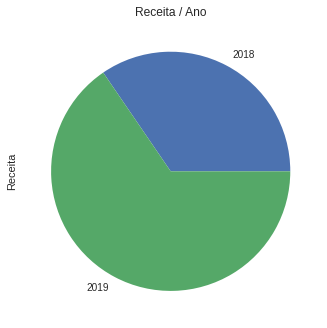

In [ ]:
# Receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();
plt.title('Receita / Ano');

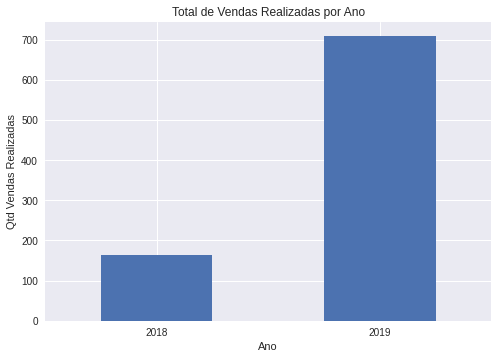

In [ ]:
# Total de Vendas Realizadas por Ano
df.groupby(df['Data'].dt.year).size().plot.bar();
plt.xlabel('Ano');
plt.ylabel('Qtd Vendas Realizadas');
plt.title('Total de Vendas Realizadas por Ano');
plt.xticks(rotation='horizontal');

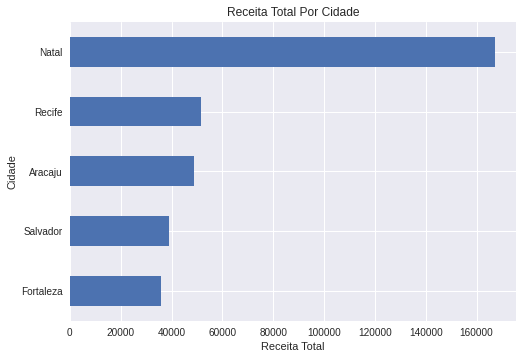

In [107]:
# receita por cidade
df.groupby('Cidade')['Receita'].sum().sort_values().plot.barh();
plt.xlabel('Receita Total');
plt.ylabel('Cidade');
plt.title('Receita Total Por Cidade');

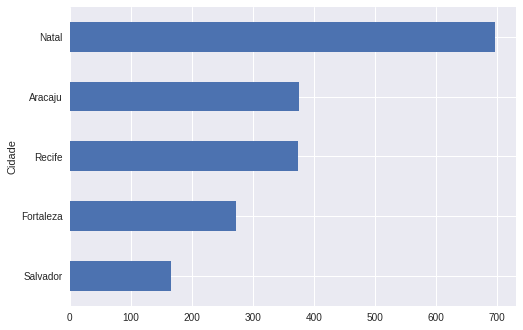

In [108]:
# receita media por cidade
round(df.groupby('Cidade')['Receita'].mean().sort_values(),2).plot.barh();

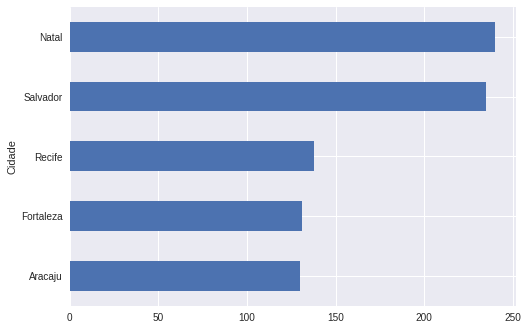

In [109]:
# vendas por cidade
df.groupby('Cidade').size().sort_values().plot.barh();

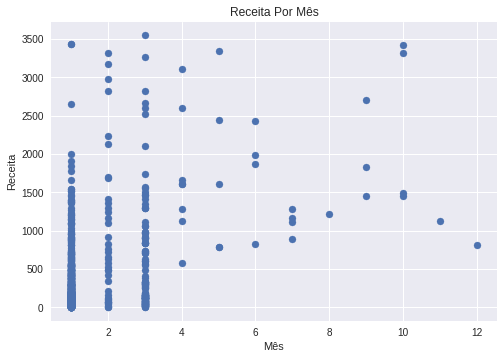

In [111]:
# dispersão de vendas por mes
plt.scatter(x=df['Data'].dt.month, y=df['Receita']);
plt.xlabel('Mês');
plt.ylabel('Receita');
plt.title('Receita Por Mês');